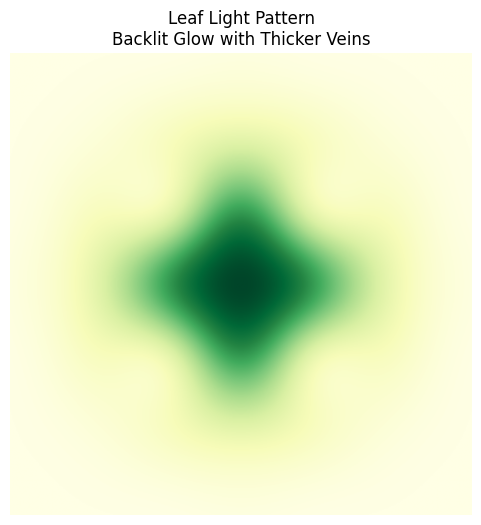

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create grid for leaf simulation with stronger vein structure
x = np.linspace(-2, 2, 600)
y = np.linspace(-2, 2, 600)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Base transmission (radial gradient glow)
base_intensity = np.exp(-R**2)

# Stronger and thicker "veins"
veins = (np.sin(2*X) * np.sin(2*Y))**2   # lower frequency = thicker veins
veins_pattern = 1 - 0.7*veins            # darker impact for veins

# Combine leaf effect
leaf_intensity_thick = base_intensity * veins_pattern

# Plot with a different colormap for a natural look
plt.figure(figsize=(6,6))
plt.imshow(leaf_intensity_thick, extent=[-2,2,-2,2], cmap="YlGn")
plt.title("Leaf Light Pattern\nBacklit Glow with Thicker Veins")
plt.axis("off")
plt.show()

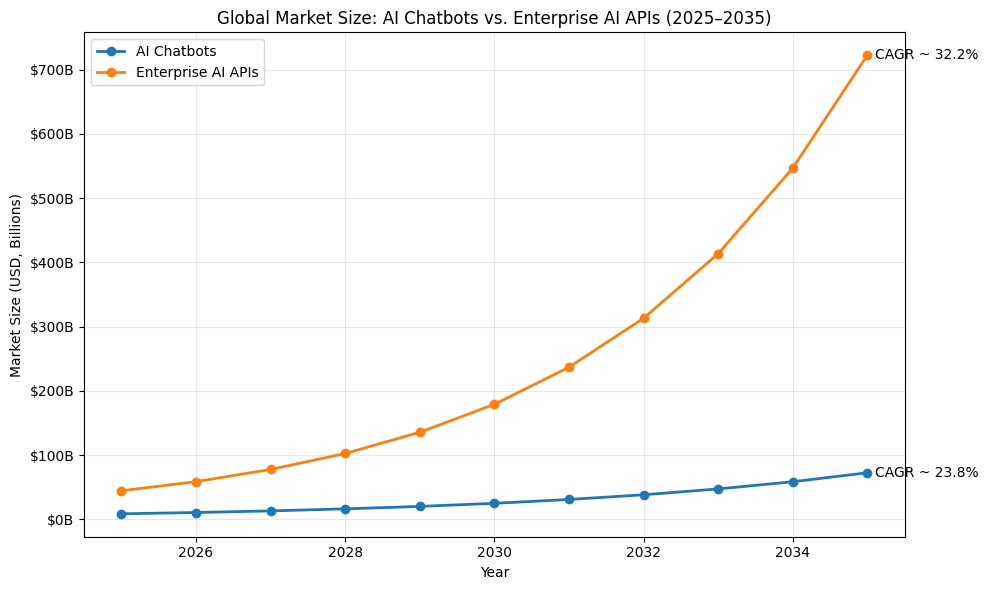

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# ---- Data (USD billions) ----
years = np.arange(2025, 2036)

# AI Chatbots (consensus-style series)
chatbots = np.array([
    8.6,   # 2025
    10.6,  # 2026
    13.1,  # 2027 (est.)
    16.3,  # 2028 (est.)
    20.1,  # 2029 (est.)
    24.9,  # 2030 (est.)
    30.9,  # 2031 (est.)
    38.2,  # 2032 (est.)
    47.3,  # 2033 (est.)
    58.5,  # 2034 (est.)
    72.5   # 2035
])

# Enterprise AI APIs (platform/API services)
enterprise_apis = np.array([
    44.4,   # 2025
    58.7,   # 2026
    77.6,   # 2027 (est.)
    102.5,  # 2028 (est.)
    135.5,  # 2029 (est.)
    179.1,  # 2030
    236.8,  # 2031 (est.)
    313.0,  # 2032 (est.)
    413.6,  # 2033 (est.)
    546.7,  # 2034 (est.)
    722.6   # 2035 (est.)
])

# ---- Helpers ----
def billions_fmt(x, _pos):
    return f'${x:,.0f}B'

def CAGR(start, end, n_years):
    return (end / start)**(1 / n_years) - 1

chatbot_cagr = CAGR(chatbots[0], chatbots[-1], years[-1] - years[0])
api_cagr = CAGR(enterprise_apis[0], enterprise_apis[-1], years[-1] - years[0])

# ---- Plot ----
fig, ax = plt.subplots(figsize=(10, 6))

# Single chart with two lines (no explicit colors)
ax.plot(years, chatbots, marker='o', linewidth=2, label='AI Chatbots')
ax.plot(years, enterprise_apis, marker='o', linewidth=2, label='Enterprise AI APIs')

# Title & labels
ax.set_title('Global Market Size: AI Chatbots vs. Enterprise AI APIs (2025–2035)')
ax.set_xlabel('Year')
ax.set_ylabel('Market Size (USD, Billions)')

# Y-axis formatting to $XB
ax.yaxis.set_major_formatter(FuncFormatter(billions_fmt))

# Grid and legend
ax.grid(True, alpha=0.3)
ax.legend()

# Optional: annotate CAGRs on the right side
ax.text(
    years[-1] + 0.1, chatbots[-1],
    f'CAGR ~ {chatbot_cagr*100:.1f}%',
    va='center'
)
ax.text(
    years[-1] + 0.1, enterprise_apis[-1],
    f'CAGR ~ {api_cagr*100:.1f}%',
    va='center'
)

# Tight layout and show
plt.tight_layout()
plt.show()

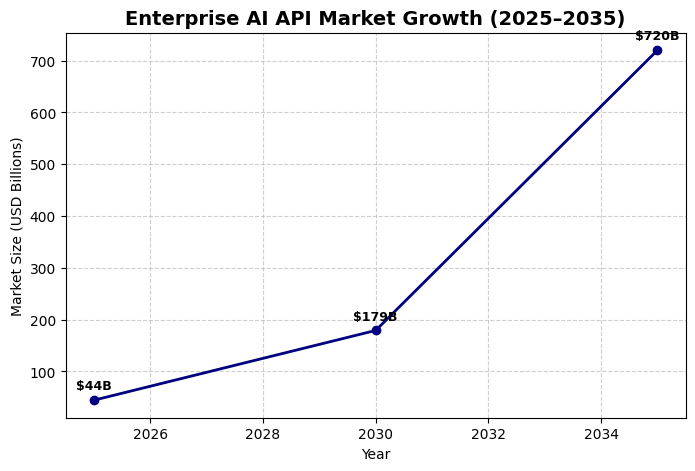

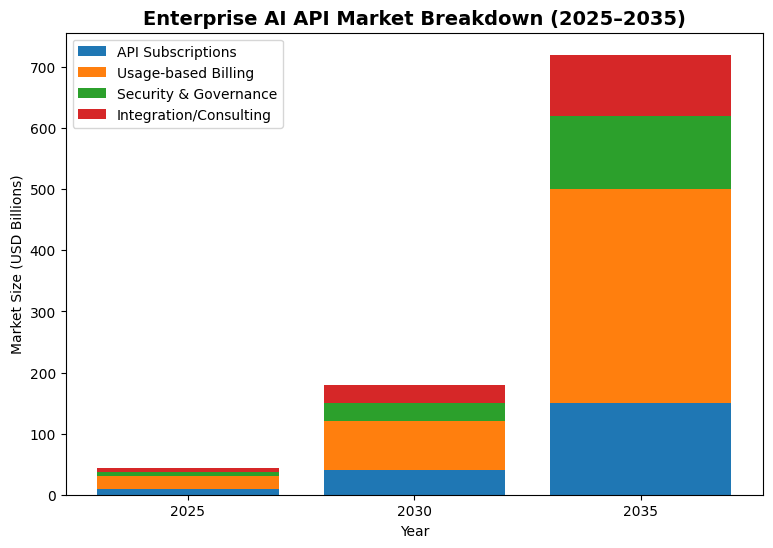

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Enterprise AI API Market
years = [2025, 2030, 2035]
market_size = [44.4, 179.1, 720.0]  # USD Billions

# --- Line Graph ---
plt.figure(figsize=(8,5))
plt.plot(years, market_size, marker='o', linestyle='-', linewidth=2, color="navy")
plt.title("Enterprise AI API Market Growth (2025–2035)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Market Size (USD Billions)")
plt.grid(True, linestyle='--', alpha=0.6)
for x, y in zip(years, market_size):
    plt.text(x, y+20, f"${y:.0f}B", ha='center', fontsize=9, fontweight='bold')
plt.show()

# --- Stacked Bar Chart ---
# Illustrative breakdown of components
components = {
    "API Subscriptions": [10, 40, 150],
    "Usage-based Billing": [20, 80, 350],
    "Security & Governance": [8, 30, 120],
    "Integration/Consulting": [6.4, 29.1, 100]
}

# Convert years to string for categorical axis
years_cat = [str(year) for year in years]

fig, ax = plt.subplots(figsize=(9,6))
bottom = np.zeros(len(years_cat))

for comp, values in components.items():
    ax.bar(years_cat, values, bottom=bottom, label=comp)
    bottom += np.array(values)

ax.set_title("Enterprise AI API Market Breakdown (2025–2035)", fontsize=14, fontweight='bold')
ax.set_ylabel("Market Size (USD Billions)")
ax.set_xlabel("Year")
ax.set_xticks(years_cat)
ax.legend()
plt.show()

/var/folders/rd/bzzc96fj7v9frj3zp_zwgn100000gn/T/ipykernel_15110/1951821689.py:11: RuntimeWarning: divide by zero encountered in log
  return x0 - (1/k) * np.log(L/y - 1)


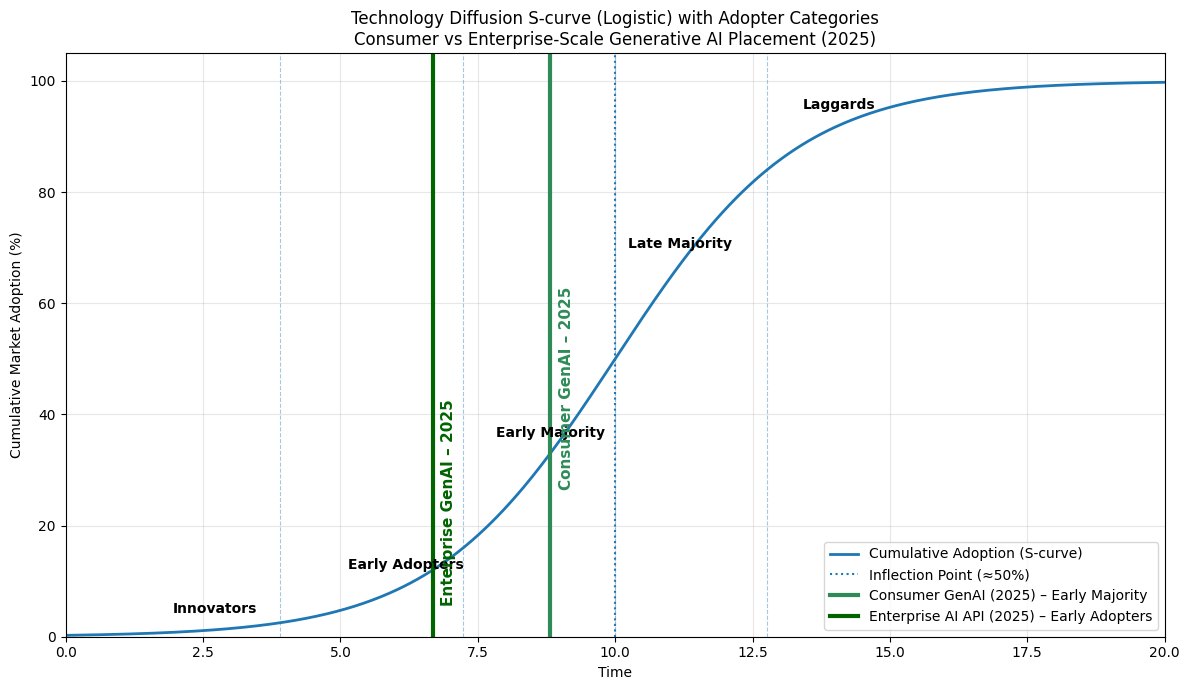

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- Logistic S-curve setup ---
time = np.linspace(0, 20, 500)

def logistic(t, L=100, k=0.6, x0=10):
    return L / (1 + np.exp(-k*(t - x0)))

def inv_logistic(y, L=100, k=0.6, x0=10):
    return x0 - (1/k) * np.log(L/y - 1)

curve = logistic(time)

# Category cumulative boundaries (%): Innovators 2.5, Early Adopters 16, Early Majority 50, Late Majority 84
boundaries_pct = [2.5, 16, 50, 84, 100]
boundary_x = [inv_logistic(p) for p in boundaries_pct]

# Category midpoint x-positions for labels
midpoints_pct = [(0+2.5)/2, (2.5+16)/2, (16+50)/2, (50+84)/2, (84+100)/2]
mid_x = [inv_logistic(p) for p in midpoints_pct]
cat_names = ["Innovators", "Early Adopters", "Early Majority", "Late Majority", "Laggards"]

# Placement per corrected request:
# Consumer GenAI: firmly in Early Majority, but not yet at inflection (≈30–35% adoption)
consumer_x = inv_logistic(33)  
consumer_y = logistic(consumer_x)

# Enterprise-scale GenAI: Early Adopters (~12% adoption)
enterprise_x = inv_logistic(12)  
enterprise_y = logistic(enterprise_x)

# --- Plot ---
plt.figure(figsize=(12,7))

# S-curve
plt.plot(time, curve, linewidth=2, label="Cumulative Adoption (S-curve)")

# Inflection point (50%)
plt.axvline(x=boundary_x[2], linestyle=":", linewidth=1.5, label="Inflection Point (≈50%)")

# Category boundary markers (light dashed)
for x in boundary_x[:-1]:  # skip 100%
    plt.axvline(x=x, linestyle="--", linewidth=0.8, alpha=0.4)

# Category labels
for name, x in zip(cat_names, mid_x):
    y = logistic(x)
    plt.text(x, y+3, name, ha="center", fontsize=10, fontweight="bold")

# User-specified markers
plt.axvline(x=consumer_x, color="seagreen", linewidth=3, label="Consumer GenAI (2025) – Early Majority")
plt.axvline(x=enterprise_x, color="darkgreen", linewidth=3, label="Enterprise AI API (2025) – Early Adopters")

# Annotations
plt.text(consumer_x+0.15, consumer_y-6, "Consumer GenAI – 2025", rotation=90, color="seagreen", fontsize=11, fontweight="bold")
plt.text(enterprise_x+0.15, enterprise_y-6, "Enterprise GenAI – 2025", rotation=90, color="darkgreen", fontsize=11, fontweight="bold")

# Titles and axes
plt.title("Technology Diffusion S-curve (Logistic) with Adopter Categories\nConsumer vs Enterprise-Scale Generative AI Placement (2025)")
plt.xlabel("Time")
plt.ylabel("Cumulative Market Adoption (%)")
plt.ylim(0, 105)
plt.xlim(0, 20)
plt.legend()
plt.grid(alpha=0.3)

# Save for download
plt.tight_layout()
#plt.savefig("/mnt/data/genai_diffusion_consumer_vs_enterprise_2025_corrected.png", dpi=220)

plt.show()

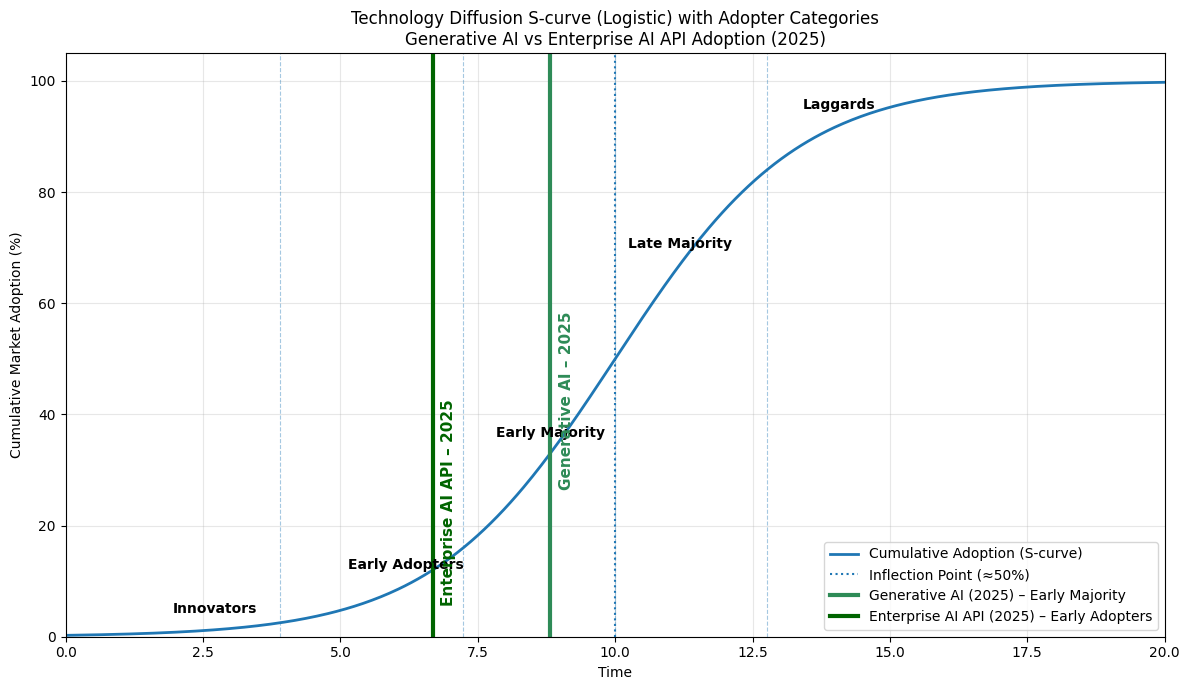

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Logistic S-curve setup ---
time = np.linspace(0, 20, 500)

def logistic(t, L=100, k=0.6, x0=10):
    return L / (1 + np.exp(-k*(t - x0)))

def inv_logistic(y, L=100, k=0.6, x0=10):
    # Avoid divide by zero or negative log input
    y = np.clip(y, 1e-6, L - 1e-6)
    return x0 - (1/k) * np.log(L/y - 1)


curve = logistic(time)

# Category cumulative boundaries (%): Innovators 2.5, Early Adopters 16, Early Majority 50, Late Majority 84
boundaries_pct = [2.5, 16, 50, 84, 100]
boundary_x = [inv_logistic(p) for p in boundaries_pct]

# Category midpoint x-positions for labels
midpoints_pct = [(0+2.5)/2, (2.5+16)/2, (16+50)/2, (50+84)/2, (84+100)/2]
mid_x = [inv_logistic(p) for p in midpoints_pct]
cat_names = ["Innovators", "Early Adopters", "Early Majority", "Late Majority", "Laggards"]

# Placement per corrected request:
# Consumer GenAI: firmly in Early Majority, but not yet at inflection (≈30–35% adoption)
consumer_x = inv_logistic(33)  
consumer_y = logistic(consumer_x)

# Enterprise-scale GenAI: Early Adopters (~12% adoption)
enterprise_x = inv_logistic(12)  
enterprise_y = logistic(enterprise_x)

# --- Plot ---
plt.figure(figsize=(12,7))

# S-curve
plt.plot(time, curve, linewidth=2, label="Cumulative Adoption (S-curve)")

# Inflection point (50%)
plt.axvline(x=boundary_x[2], linestyle=":", linewidth=1.5, label="Inflection Point (≈50%)")

# Category boundary markers (light dashed)
for x in boundary_x[:-1]:  # skip 100%
    plt.axvline(x=x, linestyle="--", linewidth=0.8, alpha=0.4)

# Category labels
for name, x in zip(cat_names, mid_x):
    y = logistic(x)
    plt.text(x, y+3, name, ha="center", fontsize=10, fontweight="bold")

# User-specified markers
plt.axvline(x=consumer_x, color="seagreen", linewidth=3, label="Generative AI (2025) – Early Majority")
plt.axvline(x=enterprise_x, color="darkgreen", linewidth=3, label="Enterprise AI API (2025) – Early Adopters")

# Annotations
plt.text(consumer_x+0.15, consumer_y-6, "Generative AI – 2025", rotation=90, color="seagreen", fontsize=11, fontweight="bold")
plt.text(enterprise_x+0.15, enterprise_y-6, "Enterprise AI API – 2025", rotation=90, color="darkgreen", fontsize=11, fontweight="bold")

# Titles and axes
plt.title("Technology Diffusion S-curve (Logistic) with Adopter Categories\nGenerative AI vs Enterprise AI API Adoption (2025)")
plt.xlabel("Time")
plt.ylabel("Cumulative Market Adoption (%)")
plt.ylim(0, 105)
plt.xlim(0, 20)
plt.legend()
plt.grid(alpha=0.3)

# Save for download
plt.tight_layout()
#plt.savefig("/mnt/data/genai_diffusion_consumer_vs_enterprise_2025_corrected.png", dpi=220)

plt.show()